# Pretzelosity Analysis

In [1]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
conf=load_config('inputs/a_ll.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 9001

## Data vs Theory

In [3]:
tabs=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) for idx in conf['resman'].sidisres.tabs.keys()])

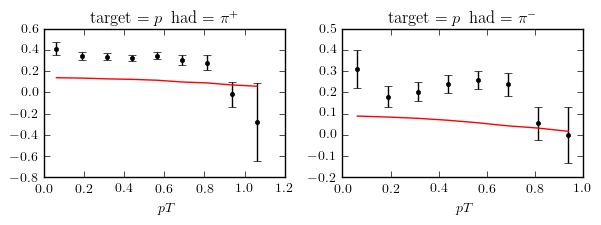

In [6]:
def plot(ax,axis,tar,had):
    data=tabs.query('axis=="%s" and target=="%s" and hadron=="%s" '%(axis,tar,had))
    if axis=='pt': axis='pT'
    ax.errorbar(data[axis],data['value'],yerr=data['alpha'],fmt='k.')
    ax.plot(data[axis],data['thy'],'r-')
    if tar=='proton': star='p'
    if tar=='neutron': star='n'
    if tar=='deuteron': star='d'
    if had=='pi+': shad=r'\pi^+'
    if had=='pi-': shad=r'\pi^-'
    ax.set_title(r'${\rm target}=%s~~{\rm had}=%s$'%(star,shad))
    ax.set_xlabel(r'$%s$'%axis)
    if axis=='x': ax.set_ylim(-0.15,0.15)

nrows,ncols=4,4
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for tar in ['proton']:
    for had in ['pi+','pi-']:
        for axis  in ['pT']:
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt)
            plot(ax,axis,tar,had)
py.tight_layout()